In [107]:
import pandas as pd
import numpy as np


file = pd.read_csv('apple_quality.csv')

# file.columns
# file.Acidity
# file.Quality

x_train = np.transpose(np.array([    np.array(file.Size,dtype= np.float32)[:3200],
                        np.array(file.Weight,dtype= np.float32)[:3200],
                        np.array(file.Sweetness,dtype= np.float32)[:3200],
                        np.array(file.Crunchiness,dtype= np.float32)[:3200],
                        np.array(file.Juiciness,dtype= np.float32)[:3200],
                        np.array(file.Ripeness,dtype=np.float32)[:3200],
                        np.array(file.Acidity,dtype= np.float32)[:3200]], dtype="object")).astype(np.float32)

y_train = np.array(file.Quality,dtype= "object")[:3200]
y_train = np.where(y_train == 'bad', 0, np.where(y_train == 'good', 1, y_train)).astype(np.float32)


x_test = np.transpose(np.array([     np.array(file.Size,dtype= np.float32)[3200:],
                        np.array(file.Weight,dtype= np.float32)[3200:],
                        np.array(file.Sweetness,dtype= np.float32)[3200:],
                        np.array(file.Crunchiness,dtype= np.float32)[3200:],
                        np.array(file.Juiciness,dtype= np.float32)[3200:],
                        np.array(file.Ripeness,dtype= np.float32)[3200:],
                        np.array(file.Acidity,dtype= np.float32)[3200:]], dtype="object")).astype(np.float32)

y_test = np.array(file.Quality,dtype= "object")[3200:]
y_test = np.where(y_test == 'bad', 0.0, np.where(y_test == 'good', 1.0, y_test)).astype(np.float32)

print(x_train[0], y_train[0])


[-3.9700484  -2.5123365   5.3463297  -1.0120087   1.8449004   0.3298398
 -0.49159047] 1.0


In [108]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1, l2
from keras.layers import Dropout
from keras.layers import BatchNormalization


model = Sequential()
model.add(Dense(64, input_shape=(7,), activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [109]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [110]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = "val_loss", patience=3, restore_best_weights=True)
hist = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
80/80 [==============================] - 1s 2ms/step - loss: 0.5402 - accuracy: 0.7281 - val_loss: 0.4675 - val_accuracy: 0.7859
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8336 - val_loss: 0.3836 - val_accuracy: 0.8266
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8492 - val_loss: 0.3405 - val_accuracy: 0.8484
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8695 - val_loss: 0.3119 - val_accuracy: 0.8703
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.8797 - val_loss: 0.2985 - val_accuracy: 0.8687
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.2838 - accuracy: 0.8789 - val_loss: 0.2864 - val_accuracy: 0.8766
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.2655 - accuracy: 0.8871 - val_loss: 0.2800 - val_accuracy: 0.8766
Epoch 8/100
8

In [111]:
model.save('apples.keras')

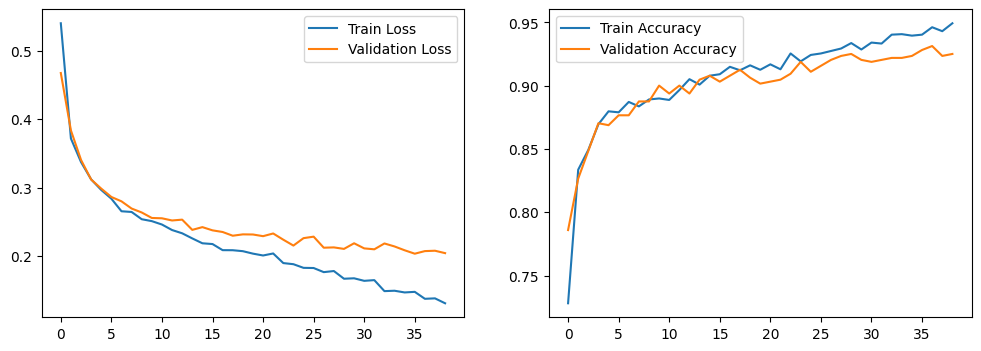

In [112]:
hist.history['accuracy']

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()

In [113]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

25/25 [==============================] - 0s 750us/step - loss: 0.1982 - accuracy: 0.9362
Test Accuracy: 0.9362499713897705
